# Tutorial 2: My first matching.

# Objectives:
#### - Match the FODO cell of Tutorial 1 using the thin lens approximation.
#### - Thick and thin lens approximation optics comparison.
#### - Tune and beta-function dependence on K1.


# Python libraries 

In [1]:
#########################################
# Python libraries                      #
#########################################
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# For symbolic computation (solving algebra problems)
import sympy as sp

#########################################
# Cpymad library                        #
#########################################
from cpymad.madx import Madx 

#### Considering the periodic solution of the equation of motion of a FODO cell and imposing the **thin lens approximation** and the stability condition one can get the following relations between optics parameters and magnets properties:

#### $\color{blue}{\text{Figure 1:Thin lens approximation FODO phase advance as a function of K, $L_{cell}$ and $L_q$}}$

In [2]:
# Relation between the phase advance of the cell and K, Lcell, Lq 
a, b, g, m, d, Lq, Lc, K, pi = sp.symbols(r'\alpha,\beta, \gamma,\mu, \Delta, L_{q}, L_{cell} K \pi')
sp.Eq(d*m/pi,2/pi*sp.asin(K*Lq*Lc/4))

Eq(\Delta*\mu/\pi, 2*asin(K*L_{cell}*L_{q}/4)/\pi)

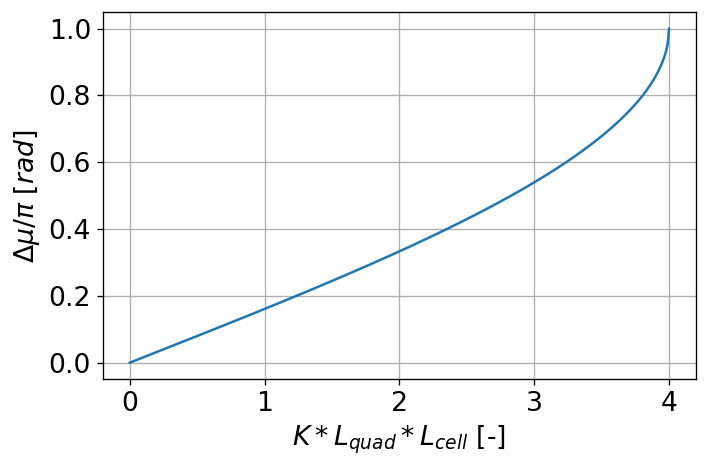

In [3]:
# Parametric plots
plt.rcParams['figure.dpi'] = 120

x=np.arange(0,4.01,0.01)
y=2*np.arcsin(x/4)/np.pi
fig, ax1 = plt.subplots()
ax1.plot(x,y,'-')
ax1.set_ylabel("$\Delta \mu / \pi~[rad]$", fontsize=16)
ax1.set_xlabel("$K*L_{quad}*L_{cell}$ [-]", fontsize=16)
ax1.grid()
ax1.tick_params(axis='both', labelsize=16)
plt.tight_layout()  

#### $\color{blue}{\text{Figure 2: Thin lens approximation maximum and minimum FODO $\beta$-function as a function of K, $L_{cell}$ and $L_q$}}$ 

In [4]:
# Relation between the beta of the cell and K, Lcell, Lq
a, bmin, bmax, g, m, d, Lq, Lc, K, pi = sp.symbols(r'\alpha,\beta_{min}, \beta_{max}, \gamma,\mu, \Delta, L_{q}, L_{cell} K \pi')
sp.Eq(bmin/Lc,(1-(K*Lq*Lc/4))/(sp.sin(2*sp.asin(K*Lq*Lc/4))))

Eq(\beta_{min}/L_{cell}, (-K*L_{cell}*L_{q}/4 + 1)/sin(2*asin(K*L_{cell}*L_{q}/4)))

In [5]:
sp.Eq(bmax/Lc,(1+(K*Lq*Lc/4))/(sp.sin(2*sp.asin(K*Lq*Lc/4))))

Eq(\beta_{max}/L_{cell}, (K*L_{cell}*L_{q}/4 + 1)/sin(2*asin(K*L_{cell}*L_{q}/4)))

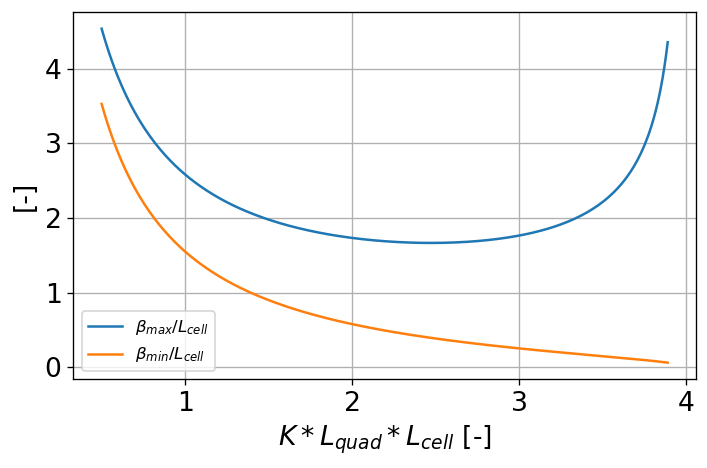

In [6]:
plt.rcParams['figure.dpi'] = 120

x=np.arange(0.5,3.90,0.01)
betamax=(1+(x/4))/(np.sin(2*np.arcsin(x/4)))
betamin=(1-(x/4))/(np.sin(2*np.arcsin(x/4)))
fig, ax1 = plt.subplots()
ax1.plot(x,betamax,'-',label=r"$\beta_{max}/L_{cell}$")
ax1.plot(x,betamin,'-',label=r"$\beta_{min}/L_{cell}$")
ax1.set_ylabel("[-]", fontsize=16)
ax1.set_xlabel("$K*L_{quad}*L_{cell}$ [-]", fontsize=16)
plt.grid()
plt.legend()
plt.tick_params(axis='both', labelsize=16)
plt.tight_layout()  

# Questions

#### 1. Try to TWISS the FODO cell defined in Tutorial 1 powering the quadrupoles to obtain a ∆μ ~ 90° in the cell using the thin lens approximation (Figure 1).
     
#### 2. What is the $\beta_{max}$ compared with the thin lens approximation solution from Figure 2?

#### 3. Halve the focusing strength of the quadrupoles, what is the effect of it on the $\beta_{max}$ and $\beta_{min}$ and on the $\Delta \mu$? Compare with the thin lens approximation from Figure 1 and Figure 2.

#### 4. Compute the maximum beam size $\sigma$ assuming a normalized emittance of 3 mrad mm and $E_{tot}= 7 TeV$.

# Python plot commands

#### You can copy/paste, uncomment and apply the example below for plotting:

In [7]:
###########################
#### Plot example code ####
###########################

#### To change the size of the plot window
# plt.rcParams['figure.dpi'] = 100

#### Plot command
# plt.plot(x,y,'ob',label='Example')

#### Adding labels
# plt.xlabel('s[m]')
# plt.ylabel('[m]')

#### Adding a legend
# plt.legend(loc='best')

# Launching MAD-X

In [8]:
# madx = Madx(stdout=True)
madx = Madx()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2022.12.06 13:44:39      +
  ++++++++++++++++++++++++++++++++++++++++++++


# Methods in the Madx class from cpymad library to be used:

#### To run the MAD-X lattice input file:

`madx.call('name_of_the_file.madx')`

#### To save the MAD-X output data from the TWISS and SUMM tables into a pandas dataframe: 

`madx.table.twiss.dframe()`

`madx.table.summ.dframe()`

#### To run a MAD-X command from the Jupyter-notebook: 

`madx.input("MAD-X command")`

# Python libraries 

In [9]:
#########################################
# Python libraries                      #
#########################################
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# For symbolic computation (solving algebra problems)
import sympy as sp

#########################################
# Cpymad library                        #
#########################################
from cpymad.madx import Madx 

# Solutions

#### 1. Try to TWISS the FODO cell defined in Tutorial 1 powering the quadrupoles to obtain a ∆μ ~ 90° in the cell using the thin lens approximation (Figure 1). 

In [10]:
# From the plot from Tutoria 1, for 90 degrees phase advance the product k*Lcell*lq as to be ~2.8

In [51]:
# Therefore the strength needed for the quadrupoles is:
quadrupoleLenght=5
cellLength=100
myK=2.8/cellLength/quadrupoleLenght
print(myK)

0.005599999999999999


In [52]:
madx=Madx()
madx.call('Tutorial2_solution.madx');


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2022.12.06 13:51:18      +
  ++++++++++++++++++++++++++++++++++++++++++++
! *********************************************************************

! Definition of parameters

! *********************************************************************



l_cell=100;

quadrupoleLenght=5;

myK:=0.0056;// m^-2



! *********************************************************************

! Definition of magnets

! ********************************************************************* 

QF: quadrupole, L=quadrupoleLenght, K1:=myK;

QD: quadrupole, L=quadrupoleLenght, K1:=-myK;



! *********************************************************************

! Definition of sequence

! *********************************************************************

myCell:sequence, refer=centre, L=L_CELL;

qua

#### After loading the lattice we can define the beam, activate the sequence and run the MAD-X TWISS action to compute the optics from the pythonic environment uing the method `madx.input()`

In [53]:
myString='''
! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=proton, energy=2;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS
! *********************************************************************

twiss, file=MyfirstFODO.madx;'''
madx.input(myString)

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.2363728498      -0.3307573246        160.6036546                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.2363728498 

               dq2            betymax              dymax              dyrms 
     -0.3307573246        160.6036546                 -0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

True

#### Then, we can access the MAD-X output data and put it into a pandas dataframe using the commands `madx.table.twiss.dframe()`

In [54]:
myDFTwiss=madx.table.twiss.dframe()
myDFTwiss[["name", "keyword","betx","bety","alfx","alfy", "mux", "muy" ]]

,name,keyword,betx,bety,alfx,alfy,mux,muy
#s,mycell$start:1,marker,160.603655,34.217492,-2.259847,0.548735,0.000000,0.000000
quadrupole1,quadrupole1:1,quadrupole,160.603655,34.217492,2.259847,-0.548735,0.004841,0.023892
drift_0[0],drift_0:0,drift,85.419675,71.376768,1.499352,-1.309229,0.032151,0.090204
marker1,marker1:1,marker,85.419675,71.376768,1.499352,-1.309229,0.032151,0.090204
drift_1[0],drift_1:0,drift,34.217492,160.603655,0.548735,-2.259847,0.108661,0.127712
quadrupole2,quadrupole2:1,quadrupole,34.217492,160.603655,-0.548735,2.259847,0.132553,0.132553
drift_2[0],drift_2:0,drift,71.376768,85.419675,-1.309229,1.499352,0.198864,0.159863
marker2,marker2:1,marker,71.376768,85.419675,-1.309229,1.499352,0.198864,0.159863
drift_3[0],drift_3:0,drift,160.603655,34.217492,-2.259847,0.548735,0.236373,0.236373
#e,mycell$end:1,marker,160.603655,34.217492,-2.259847,0.548735,0.236373,0.236373


In [55]:
myDFSumm=madx.table.summ.dframe()
myDFSumm

,length,orbit5,alfa,gammatr,q1,dq1,betxmax,dxmax,dxrms,xcomax,...,ycorms,deltap,synch_1,synch_2,synch_3,synch_4,synch_5,synch_6,synch_8,nflips
#e,100.0,-0.0,0.0,0.0,0.236373,-0.330757,160.603655,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
#Phase advance computed by MAD-X in rad
myDFSumm["q1"]*2*np.pi

#e    1.485174
Name: q1, dtype: float64

In [57]:
#Phase advance computed by MAD-X in degrees
myDFSumm["q1"]*2*np.pi*180/np.pi

#e    85.094226
Name: q1, dtype: float64

#### 2. What is the $\beta_{max}$ compared with the thin lens approximation solution from Figure 2? 

In [58]:
#From the MAD-X calculation
myDFTwiss['betx'].max()

160.60365457633446

In [59]:
#From Figure 1 
#K1*Lcell*Lq=
0.0056*100*5

2.8

In [60]:
#From Figure 2 for a value of K1*Lcell*Lq=2.8 the beta_max
1.697*100

169.70000000000002

In [61]:
# We can compute the relative variation

In [62]:
print('The relative variation in [%] between the thin and thick lens approximation for the maximum beta-function is:')
print(((169.70-160.60)/169.70)*100)

The relative variation in [%] between the thin and thick lens approximation for the maximum beta-function is:
5.362404242781376


#### 3. Halve the focusing strength of the quadrupoles, what is the effect of it on the $\beta_{max}$ and $\beta_{min}$ and on the $\Delta \mu$? Compare with the thin lens approximation from Figure 1 and Figure 2.

In [80]:
myString='''
cellLength=100;
quadrupoleLenght=5;
myK:=1.4/cellLength/quadrupoleLenght;// m^-2
twiss, file=firstTwiss.txt;
'''

madx.input(myString);

++++++ info: celllength redefined
++++++ info: quadrupolelenght redefined
++++++ info: myk redefined
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.1097878119      -0.1294769478        207.8536354                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.1097878119 

               dq2            betymax              dymax              dyrms 
     -0.1294769478        207.8536354                  0                  0 

            ycomax             ycorms             deltap            synch_1 
       

In [81]:
# Here we illustrate another way of printing the data using pure MAD-X commands
myString='''
value, table(SUMM,Q1);
value, table(SUMM,Q2);
value, table(SUMM,betxmax);
value, table(SUMM,betymax);
'''
madx.input(myString);

table( summ q1 )   =       0.1097878119 ;
table( summ q2 )   =       0.1097878119 ;
table( summ betxmax ) =        207.8536354 ;
table( summ betymax ) =        207.8536354 ;


In [82]:
# Here the option using the pythonic approach
myDFTable=madx.table.twiss.dframe()
myDFTable
print("bmax:")
display(myDFTable["betx"].max())
print("bmin:")
display(myDFTable["betx"].min())
print("q1:")
display(myDFTable["mux"].max())
print("q2:")
display(myDFTable["mux"].max())

bmax:


207.8536353873797

bmin:


105.19189274791336

q1:


0.10978781186751314

q2:


0.10978781186751314

#### If we reduce the strength of the quadrupoles, k, the bmax increases and therfore the beam size.

In [83]:
# If compared with the thin lens approximtion
# K1*Lcell*Lq
0.0028*100*5

1.4

In [84]:
#From Figure 2 
2.042*100

204.2

In [85]:
# Value from MADX
bmax=np.max(myDFTable["betx"])
bmax

207.8536353873797

In [86]:
# Relative variation
((205.46040125139584-204.2)/205.46040125139584)*100

0.6134521512267733

#### Better agreement is observed as we move to the left on the parametric plot (smaller K for fixed Lq and cell length values) as the thin lens approximation condition is better satisfied.

#### 4. Compute the maximum beam size $\sigma$ assuming a normalized emittance of 3 mrad mm and $E_{tot}= 7 TeV$.

#### One has to remember
#### \begin{equation} \sigma=\sqrt{\frac{\beta \epsilon_n}{ \gamma_r}} \end{equation} 

In [87]:
emittance_n=3e-6 #m*rad
beta_gamma=7000/.938 # this is an approximation
np.sqrt(myDFTwiss['betx'].max()*emittance_n/beta_gamma)

0.0002540918517774359

In [88]:
# In mm
0.0002540918517774359*1e3

0.2540918517774359

# **EXTRA**

# Thin lens approximation (using MAD-X)

In [131]:
madx=Madx()
madx.call("Tutorial2_solution.madx")


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2022.12.06 14:09:37      +
  ++++++++++++++++++++++++++++++++++++++++++++
! *********************************************************************

! Definition of parameters

! *********************************************************************



l_cell=100;

quadrupoleLenght=5;

myK:=0.0056;// m^-2



! *********************************************************************

! Definition of magnets

! ********************************************************************* 

QF: quadrupole, L=quadrupoleLenght, K1:=myK;

QD: quadrupole, L=quadrupoleLenght, K1:=-myK;



! *********************************************************************

! Definition of sequence

! *********************************************************************

myCell:sequence, refer=centre, L=L_CELL;

qua

In [132]:
# You need to have your lattice elements referred to the center

In [133]:
myString='''
myCell:sequence, refer=center, L=L_CELL;
quadrupole1: QF, at=2.5;
marker1: marker, at=25;
quadrupole2: QD, at=52.5;
marker2: marker, at=75;
endsequence;'''

madx.input(myString)

++++++ warning: implicit element re-definition ignored: quadrupole1
++++++ warning: implicit element re-definition ignored: marker1
++++++ warning: implicit element re-definition ignored: quadrupole2
++++++ warning: implicit element re-definition ignored: marker2


True

In [134]:
myString='''
! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=proton, energy=2;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS
! *********************************************************************

twiss, file=MyfirstFODO.madx;'''
madx.input(myString)

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.2363728498      -0.3307573246        160.6036546                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.2363728498 

               dq2            betymax              dymax              dyrms 
     -0.3307573246        160.6036546                 -0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

True

In [135]:
myString='''
! TWISS before making the lattice thin
use,sequence=myCell; 
twiss,table=thick,file=thick.txt;

! Makethin command
select, flag=makethin, class=quadrupole, slice=5; 
makethin,sequence=myCell; 

! TWISS after making the lattice thin
use,sequence=myCell;
twiss,table=thin,file=thin.txt;
'''
madx.input(myString)

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.2363728498      -0.3307573246        160.6036546                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.2363728498 

               dq2            betymax              dymax              dyrms 
     -0.3307573246        160.6036546                 -0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

True

In [136]:
myDF_thick=madx.table.thick.dframe()
myDF_thick

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
#s,mycell$start:1,marker,0.0,160.603655,-2.259847,0.000000,34.217492,0.548735,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
quadrupole1,quadrupole1:1,quadrupole,5.0,160.603655,2.259847,0.004841,34.217492,-0.548735,0.023892,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,25.0,85.419675,1.499352,0.032151,71.376768,-1.309229,0.090204,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
marker1,marker1:1,marker,25.0,85.419675,1.499352,0.032151,71.376768,-1.309229,0.090204,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,50.0,34.217492,0.548735,0.108661,160.603655,-2.259847,0.127712,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
quadrupole2,quadrupole2:1,quadrupole,55.0,34.217492,-0.548735,0.132553,160.603655,2.259847,0.132553,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_2[0],drift_2:0,drift,75.0,71.376768,-1.309229,0.198864,85.419675,1.499352,0.159863,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
marker2,marker2:1,marker,75.0,71.376768,-1.309229,0.198864,85.419675,1.499352,0.159863,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_3[0],drift_3:0,drift,100.0,160.603655,-2.259847,0.236373,34.217492,0.548735,0.236373,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#e,mycell$end:1,marker,100.0,160.603655,-2.259847,0.236373,34.217492,0.548735,0.236373,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
myDF_thin=madx.table.thin.dframe()
myDF_thin

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
#s,mycell$start:1,marker,0.000000,160.597773,-2.259747,0.000000,34.217701,0.548699,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,0.416667,162.487497,-2.275590,0.000411,33.767053,0.532856,0.001951,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
quadrupole1..1,quadrupole1..1:1,multipole,0.416667,162.487497,-1.365661,0.000411,33.767053,0.343760,0.001951,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,1.458333,165.351755,-1.384027,0.001422,33.086817,0.309266,0.006912,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
quadrupole1..2,quadrupole1..2:1,multipole,1.458333,165.351755,-0.458058,0.001422,33.086817,0.123980,0.006912,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_2[0],drift_2:0,drift,2.500000,166.313981,-0.465679,0.002422,32.861825,0.092013,0.011940,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
quadrupole1,quadrupole1:1,marker,2.500000,166.313981,-0.465679,0.002422,32.861825,0.092013,0.011940,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
quadrupole1..3,quadrupole1..3:1,multipole,2.500000,166.313981,0.465679,0.002422,32.861825,-0.092013,0.011940,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_3[0],drift_3:0,drift,3.541667,165.351755,0.458058,0.003421,33.086817,-0.123980,0.016969,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
quadrupole1..4,quadrupole1..4:1,multipole,3.541667,165.351755,1.384027,0.003421,33.086817,-0.309266,0.016969,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


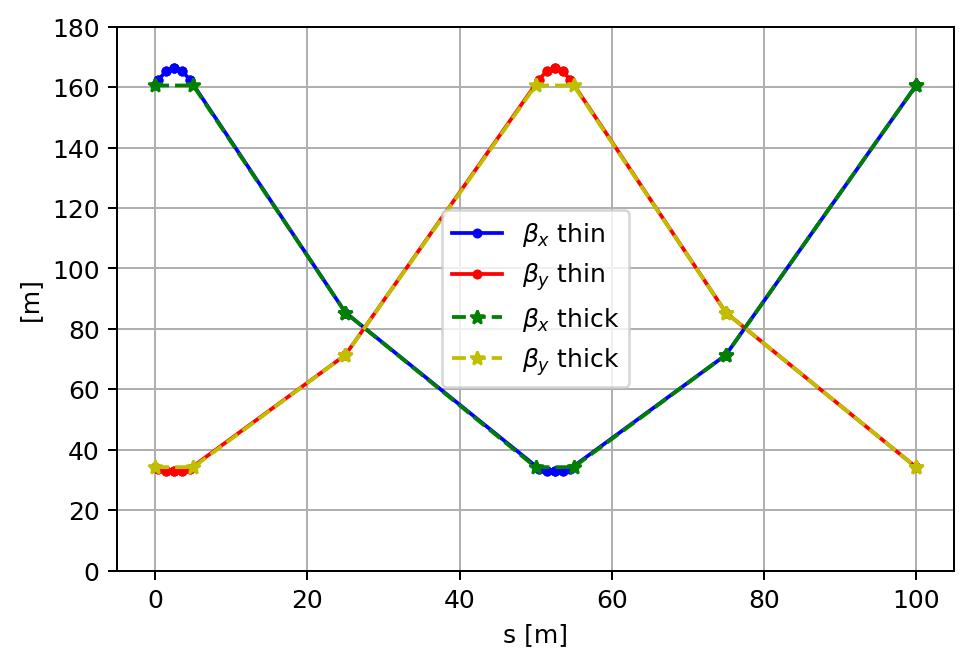

In [139]:

plt.rcParams['figure.dpi'] = 180

fig, ax1 = plt.subplots()

plt.plot(myDF_thin['s'],myDF_thin['betx'],'.-b',label='$\\beta_x$ thin')
plt.plot(myDF_thin['s'],myDF_thin['bety'],'.-r',label='$\\beta_y$ thin')
plt.plot(myDF_thick['s'],myDF_thick['betx'],'*--g',label='$\\beta_x$ thick')
plt.plot(myDF_thick['s'],myDF_thick['bety'],'*--y',label='$\\beta_y$ thick')

plt.xlabel('s [m]')
plt.ylabel('[m]')
plt.legend(loc='best')
plt.ylim(0,180)
plt.grid()